In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv

public = ["State", "Public: less-than 2-year", "Public: 2-year"]
private = ["State", "Private not-for-profit: 4-year or above", "Private not-for-profit: 2-year", "Private for-profit: 2-year", "Private for-profit: 4-year or above",  "Private not-for-profit: less-than 2-year", "Private for-profit: less-than 2-year"]

In [2]:
# Files to Load 
average_loan_amount_to_load = './data/Average_student_loans_in_dollars.csv'
average_loan_received_to_load = "./data/Percentage_Loans.csv"
graduation_percentage_race_to_load = "./data/Percent_of_graduation_by_race.csv"
graduation_percentage_state_to_load = "./data/Percent_of_graduation_by_state.csv"



In [3]:
# Read Loan and Percentage data and store into Pandas DataFrames
average_loan_amount_private = pd.read_csv(average_loan_amount_to_load, usecols=private)
average_loan_amount_public =  pd.read_csv(average_loan_amount_to_load, usecols=public)
average_loan_amount_all = pd.read_csv(average_loan_amount_to_load)
average_loan_received = pd.read_csv(average_loan_received_to_load)
graduation_percentage_race = pd.read_csv(graduation_percentage_race_to_load)
graduation_percentage_state = pd.read_csv(graduation_percentage_state_to_load)

In [4]:
#Average loan received Everything
average_loan_received.head()

,State,Public: 4-year or above,Private not-for-profit: 4-year or above,Private not-for-profit: 2-year,Private for-profit: 2-year,Public: less-than 2-year,Private for-profit: 4-year or above,Public: 2-year,Private not-for-profit: less-than 2-year,Private for-profit: less-than 2-year
0,Alaska,22%,48%,61%,82%,2%,0%,0%,0%,0%
1,Alabama,49%,62%,0%,76%,0%,34%,13%,4%,66%
2,Arkansas,46%,58%,85%,83%,0%,88%,19%,0%,65%
3,Arizona,42%,58%,0%,46%,6%,56%,10%,7%,62%
4,California,25%,48%,61%,61%,7%,56%,2%,36%,53%


In [5]:
#Graduation rate by race
graduation_percentage_race.head()

,Race/Ethnicity,Public: 4-year or above,Private not-for-profit: 4-year or above,Private for-profit: 4-year or above
0,American Indian or Alaska Native,40%,48%,15%
1,Asian or Pacific Islander,0%,0%,0%
2,Asian,74%,81%,47%
3,Native Hawaiian or Other Pacific Islander,52%,53%,16%
4,Black or African American,43%,45%,18%


In [6]:
#Graduation rate by state
graduation_percentage_state.head()

,State,Public: 4-year or above,Private not-for-profit: 4-year or above,Private for-profit: 4-year or above
0,Alaska,34%,52%,0%
1,Alabama,57%,44%,18%
2,Arkansas,47%,59%,0%
3,Arizona,63%,58%,25%
4,California,70%,75%,19%


In [7]:
#Data cleaning of average loan amounts that students received data frame
average_loan_amount_all["Public: less-than 2-year"] = average_loan_amount_all["Public: less-than 2-year"].str.replace(r'$', '')
average_loan_amount_all["Public: less-than 2-year"] = average_loan_amount_all["Public: less-than 2-year"].str.replace(r',', '')
average_loan_amount_all["Public: 2-year"] = average_loan_amount_all["Public: 2-year"].str.replace(r'$', '')
average_loan_amount_all["Public: 2-year"] = average_loan_amount_all["Public: 2-year"].str.replace(r',', '')
average_loan_amount_all["Public: 4-year or above"] = average_loan_amount_all["Public: 4-year or above"].str.replace(r'$', '')
average_loan_amount_all["Public: 4-year or above"] = average_loan_amount_all["Public: 4-year or above"].str.replace(r',', '')


average_loan_amount_all["Private not-for-profit: 4-year or above"] = average_loan_amount_all["Private not-for-profit: 4-year or above"].str.replace(r'$', '')
average_loan_amount_all["Private not-for-profit: 4-year or above"] = average_loan_amount_all["Private not-for-profit: 4-year or above"].str.replace(r',', '')
average_loan_amount_all["Private not-for-profit: 2-year"] = average_loan_amount_all["Private not-for-profit: 2-year"].str.replace(r'$', '')
average_loan_amount_all["Private not-for-profit: 2-year"] = average_loan_amount_all["Private not-for-profit: 2-year"].str.replace(r',', '')
average_loan_amount_all["Private for-profit: 2-year"] = average_loan_amount_all["Private for-profit: 2-year"].str.replace(r'$', '')
average_loan_amount_all["Private for-profit: 2-year"] = average_loan_amount_all["Private for-profit: 2-year"].str.replace(r',', '')
average_loan_amount_all["Private for-profit: 4-year or above"] = average_loan_amount_all["Private for-profit: 4-year or above"].str.replace(r'$', '')
average_loan_amount_all["Private for-profit: 4-year or above"] = average_loan_amount_all["Private for-profit: 4-year or above"].str.replace(r',', '')
average_loan_amount_all["Private not-for-profit: less-than 2-year"] = average_loan_amount_all["Private not-for-profit: less-than 2-year"].str.replace(r'$', '')
average_loan_amount_all["Private not-for-profit: less-than 2-year"] = average_loan_amount_all["Private not-for-profit: less-than 2-year"].str.replace(r',', '')
average_loan_amount_all["Private for-profit: less-than 2-year"] = average_loan_amount_all["Private for-profit: less-than 2-year"].str.replace(r'$', '')
average_loan_amount_all["Private for-profit: less-than 2-year"] = average_loan_amount_all["Private for-profit: less-than 2-year"].str.replace(r',', '')

average_loan_amount_all = average_loan_amount_all.replace(np.nan, 0)

average_loan_amount_all['Public: less-than 2-year'] = average_loan_amount_all['Public: less-than 2-year'].astype(str).astype(int)
average_loan_amount_all['Public: 2-year'] = average_loan_amount_all['Public: 2-year'].astype(str).astype(int)
average_loan_amount_all['Public: 4-year or above'] = average_loan_amount_all['Public: 4-year or above'].astype(str).astype(int)
average_loan_amount_all["Private not-for-profit: 4-year or above"] = average_loan_amount_all["Private not-for-profit: 4-year or above"].astype(str).astype(int)
average_loan_amount_all["Private not-for-profit: 2-year"] = average_loan_amount_all["Private not-for-profit: 2-year"].astype(str).astype(int)
average_loan_amount_all["Private for-profit: 2-year"] = average_loan_amount_all["Private for-profit: 2-year"].astype(str).astype(int)
average_loan_amount_all["Private for-profit: 4-year or above"] = average_loan_amount_all["Private for-profit: 4-year or above"].astype(str).astype(int)
average_loan_amount_all["Private not-for-profit: less-than 2-year"] = average_loan_amount_all["Private not-for-profit: less-than 2-year"].astype(str).astype(int)
average_loan_amount_all["Private for-profit: less-than 2-year"] = average_loan_amount_all["Private for-profit: less-than 2-year"].astype(str).astype(int)

average_loan_amount_all

,State,Public: 4-year or above,Private not-for-profit: 4-year or above,Private not-for-profit: 2-year,Private for-profit: 2-year,Public: less-than 2-year,Private for-profit: 4-year or above,Public: 2-year,Private not-for-profit: less-than 2-year,Private for-profit: less-than 2-year
0,Alaska,6743,6806,4899,7542,5444,0,0,0,0
1,Alabama,7224,8129,0,8913,0,7338,5007,4701,6698
2,Arkansas,6919,6889,6771,7753,0,9799,4706,0,6566
3,Arizona,6827,8277,0,6838,3636,8579,4139,3262,6222
4,California,6032,7629,8133,7343,5384,8419,6060,7311,6877
5,Colorado,6390,8540,8680,6871,0,8149,5765,6452,5916
6,Connecticut,7135,7330,0,7412,0,10598,4239,0,6921
7,District of Columbia,7260,6659,5720,7128,0,10236,0,0,5040
8,Delaware,6021,6279,6044,0,6561,10255,0,0,6965
9,Florida,5604,8015,6939,6830,0,9379,6144,5986,5442


In [8]:
#Data cleaning of average loan received
average_loan_received["Public: 4-year or above"] = average_loan_received["Public: 4-year or above"].str.replace(r'%', '')
average_loan_received["Public: 4-year or above"] = average_loan_received["Public: 4-year or above"].str.replace(r'.', '')
average_loan_received["Public: less-than 2-year"] = average_loan_received["Public: less-than 2-year"].str.replace(r'%', '')
average_loan_received["Public: less-than 2-year"] = average_loan_received["Public: less-than 2-year"].str.replace(r'.', '')
average_loan_received["Public: 2-year"] = average_loan_received["Public: 2-year"].str.replace(r'%', '')
average_loan_received["Public: 2-year"] = average_loan_received["Public: 2-year"].str.replace(r'.', '')
average_loan_received["Private not-for-profit: 4-year or above"] = average_loan_received["Private not-for-profit: 4-year or above"].str.replace(r'%', '')
average_loan_received["Private not-for-profit: 4-year or above"] = average_loan_received["Private not-for-profit: 4-year or above"].str.replace(r'.', '')
average_loan_received["Private not-for-profit: 2-year"] = average_loan_received["Private not-for-profit: 2-year"].str.replace(r'%', '')
average_loan_received["Private not-for-profit: 2-year"] = average_loan_received["Private not-for-profit: 2-year"].str.replace(r'.', '')
average_loan_received["Private for-profit: 2-year"] = average_loan_received["Private for-profit: 2-year"].str.replace(r'%', '')
average_loan_received["Private for-profit: 2-year"] = average_loan_received["Private for-profit: 2-year"].str.replace(r'.', '')
average_loan_received["Private for-profit: 4-year or above"] = average_loan_received["Private for-profit: 4-year or above"].str.replace(r'%', '')
average_loan_received["Private for-profit: 4-year or above"] = average_loan_received["Private for-profit: 4-year or above"].str.replace(r'.', '')
average_loan_received["Private not-for-profit: less-than 2-year"] = average_loan_received["Private not-for-profit: less-than 2-year"].str.replace(r'%', '')
average_loan_received["Private not-for-profit: less-than 2-year"] = average_loan_received["Private not-for-profit: less-than 2-year"].str.replace(r'.', '')
average_loan_received["Private for-profit: less-than 2-year"] = average_loan_received["Private for-profit: less-than 2-year"].str.replace(r'%', '')
average_loan_received["Private for-profit: less-than 2-year"] = average_loan_received["Private for-profit: less-than 2-year"].str.replace(r'.', '')


average_loan_received = average_loan_received.replace(np.nan, 0)

average_loan_received['Public: 4-year or above'] = average_loan_received['Public: 4-year or above'].astype(str).astype(float)
average_loan_received['Public: less-than 2-year'] = average_loan_received['Public: less-than 2-year'].astype(str).astype(float)
average_loan_received['Public: 2-year'] = average_loan_received['Public: 2-year'].astype(str).astype(float)
average_loan_received['Private not-for-profit: 4-year or above'] = average_loan_received['Private not-for-profit: 4-year or above'].astype(str).astype(float)
average_loan_received['Private not-for-profit: 2-year'] = average_loan_received['Private not-for-profit: 2-year'].astype(str).astype(float)
average_loan_received['Private for-profit: 2-year'] = average_loan_received['Private for-profit: 2-year'].astype(str).astype(float)
average_loan_received['Private for-profit: 4-year or above'] = average_loan_received['Private for-profit: 4-year or above'].astype(str).astype(float)
average_loan_received['Private not-for-profit: less-than 2-year'] = average_loan_received['Private not-for-profit: less-than 2-year'].astype(str).astype(float)
average_loan_received['Private for-profit: less-than 2-year'] = average_loan_received['Private for-profit: less-than 2-year'].astype(str).astype(float)

average_loan_received.head()

,State,Public: 4-year or above,Private not-for-profit: 4-year or above,Private not-for-profit: 2-year,Private for-profit: 2-year,Public: less-than 2-year,Private for-profit: 4-year or above,Public: 2-year,Private not-for-profit: less-than 2-year,Private for-profit: less-than 2-year
0,Alaska,22.0,48.0,61.0,82.0,2.0,0.0,0.0,0.0,0.0
1,Alabama,49.0,62.0,0.0,76.0,0.0,34.0,13.0,4.0,66.0
2,Arkansas,46.0,58.0,85.0,83.0,0.0,88.0,19.0,0.0,65.0
3,Arizona,42.0,58.0,0.0,46.0,6.0,56.0,10.0,7.0,62.0
4,California,25.0,48.0,61.0,61.0,7.0,56.0,2.0,36.0,53.0


In [9]:
average_loan_received.head()

#Data cleaning of graduation percentages per state
graduation_percentage_state['Public: 4-year or above'] = graduation_percentage_state['Public: 4-year or above'].str.replace(r'%', '')
graduation_percentage_state['Public: 4-year or above'] = graduation_percentage_state['Public: 4-year or above'].str.replace(r'.', '')
graduation_percentage_state['Private not-for-profit: 4-year or above'] = graduation_percentage_state['Private not-for-profit: 4-year or above'].str.replace(r'%', '')
graduation_percentage_state['Private not-for-profit: 4-year or above'] = graduation_percentage_state['Private not-for-profit: 4-year or above'].str.replace(r'.', '')
graduation_percentage_state[' Private for-profit: 4-year or above'] = graduation_percentage_state[' Private for-profit: 4-year or above'].str.replace(r'%', '')
graduation_percentage_state[' Private for-profit: 4-year or above'] = graduation_percentage_state[' Private for-profit: 4-year or above'].str.replace(r'.', '')

graduation_percentage_state = graduation_percentage_state.replace(np.nan, 0)

graduation_percentage_state['Public: 4-year or above'] = graduation_percentage_state['Public: 4-year or above'].astype(float)
graduation_percentage_state['Private not-for-profit: 4-year or above'] = graduation_percentage_state['Private not-for-profit: 4-year or above'].astype(float)/1
graduation_percentage_state[' Private for-profit: 4-year or above'] = graduation_percentage_state[' Private for-profit: 4-year or above'].astype(float)/1

graduation_percentage_state.head()

,State,Public: 4-year or above,Private not-for-profit: 4-year or above,Private for-profit: 4-year or above
0,Alaska,34.0,52.0,0.0
1,Alabama,57.0,44.0,18.0
2,Arkansas,47.0,59.0,0.0
3,Arizona,63.0,58.0,25.0
4,California,70.0,75.0,19.0


In [10]:
#Graduation/Loan data frame
graduation_and_loan_frame = pd.merge(graduation_percentage_state, average_loan_received, on = "State")
graduation_and_loan_frame.head()
public_grad_4year_above = graduation_and_loan_frame["Public: 4-year or above_x"]
privateNonProfit_grad_4year_above = graduation_and_loan_frame["Private not-for-profit: 4-year or above_x"]
privateForProfit_grad_4year_above = graduation_and_loan_frame["Private for-profit: 4-year or above"]
state = graduation_and_loan_frame["State"]
public_loan_4year_above = graduation_and_loan_frame["Public: 4-year or above_y"]
privateNonProfit_loan_4year_above = graduation_and_loan_frame["Private not-for-profit: 4-year or above_y"]
privateForProfit_loan_4year_above = graduation_and_loan_frame["Private for-profit: 4-year or above"]

graduation_and_loan_frame = pd.DataFrame({
    "State" : state,
    "Public: 4-year or above for Graduation rates" : public_grad_4year_above,
    "Private: Not for profit 4-year or above for Graduation rates" : privateNonProfit_grad_4year_above,
    "Private: For profit 4-year or above for Graduation rates" : privateForProfit_grad_4year_above,
    "Public: 4-year or above for Loan rates": public_loan_4year_above,
    "Private: Not for profit 4-year or above for Loan rates": privateNonProfit_loan_4year_above,
    "Private: For profit 4-year or above for Loan rates": privateForProfit_loan_4year_above
                            })

graduation_and_loan_frame.head()

,State,Public: 4-year or above for Graduation rates,Private: Not for profit 4-year or above for Graduation rates,Private: For profit 4-year or above for Graduation rates,Public: 4-year or above for Loan rates,Private: Not for profit 4-year or above for Loan rates,Private: For profit 4-year or above for Loan rates
0,Alaska,34.0,52.0,0.0,22.0,48.0,0.0
1,Alabama,57.0,44.0,34.0,49.0,62.0,34.0
2,Arkansas,47.0,59.0,88.0,46.0,58.0,88.0
3,Arizona,63.0,58.0,56.0,42.0,58.0,56.0
4,California,70.0,75.0,56.0,25.0,48.0,56.0


In [11]:
#Average tuition costs of all states data frame
tuition_costs = average_loan_amount_all
tuition_costs.head()
tuition_costs_4year_above = tuition_costs["Public: 4-year or above"]
tuition_costs_NonProfit_grad_4year_above = tuition_costs["Private not-for-profit: 4-year or above"]
tuition_costs_ForProfit_grad_4year_above = tuition_costs["Private for-profit: 4-year or above"]
state = tuition_costs["State"]
counter = [1]

tuition_costs = pd.DataFrame({
    "State" : state,
    "Public: Loan given for 4-year or above" : tuition_costs_4year_above,
    "Private Nonprofit: Loan given for profit 4-year or above" : tuition_costs_NonProfit_grad_4year_above,
    "Private For Profit: Loan given for 4-year or above" : tuition_costs_ForProfit_grad_4year_above
                            })

avg_tuition_public4Year_loan = tuition_costs["Public: Loan given for 4-year or above"].mean()
avg_tuition_public4Year_loan = round(avg_tuition_public4Year_loan, 2)
avg_tuition_privateNonProfit_loan = tuition_costs["Private Nonprofit: Loan given for profit 4-year or above"].mean()
avg_tuition_privateNonProfit_loan = round(avg_tuition_privateNonProfit_loan, 2)
avg_tuition_privateForProfit_loan = tuition_costs["Private For Profit: Loan given for 4-year or above"].mean()
avg_tuition_privateForProfit_loan = round(avg_tuition_privateForProfit_loan, 2)

avg_tuition_costs = pd.DataFrame({
    "Averages" : counter,
    "Public: Average Loan given for 4-year or above" : avg_tuition_public4Year_loan,
    "Private Nonprofit: Average Loan given for profit 4-year or above" : avg_tuition_privateNonProfit_loan,
    "Private For Profit: Average Loan given for 4-year or above" : avg_tuition_privateForProfit_loan
})

avg_tuition_costs.head()


,Averages,Public: Average Loan given for 4-year or above,Private Nonprofit: Average Loan given for profit 4-year or above,Private For Profit: Average Loan given for 4-year or above
0,1,6663.29,7203.94,7501.41


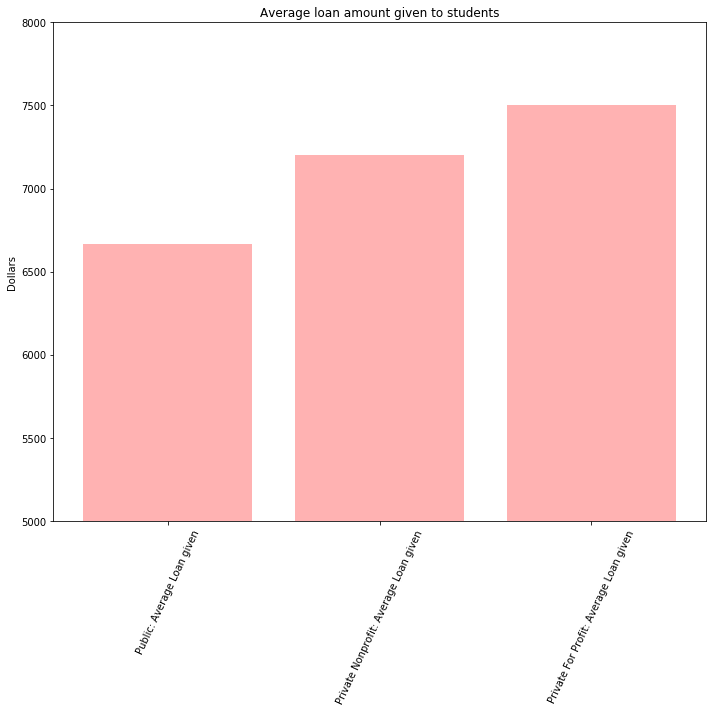

In [12]:
#Graphs average loan amount given to students in a bar graph
x_axis = ["Public: Average Loan given",  "Private Nonprofit: Average Loan given",
         "Private For Profit: Average Loan given"]
tick_locations = [value for value in x_axis]
loan_values = [6663.29, 7203.94, 7501.41]
plt.figure(figsize=(10,10))
plt.ylim(5000, 8000)
plt.bar(x_axis, loan_values, color='r', alpha=0.3, align="center")
plt.xticks(tick_locations, x_axis, rotation=65)
plt.title("Average loan amount given to students")
plt.ylabel("Dollars")
plt.tight_layout()
plt.savefig(r"C:\Users\mengc\Desktop\studentloan_analysis\Images\Average loan amount given to students BAR")
plt.show()

In [13]:
#Average graduation rates of all 50 states
avg_grad4year_rate = graduation_percentage_state["Public: 4-year or above"].mean()
avg_grad4year_rate = round(avg_grad4year_rate, 2)
avg_grad4yearNonprofit_rate = graduation_percentage_state["Private not-for-profit: 4-year or above"].mean()
avg_grad4yearNonprofit_rate = round(avg_grad4yearNonprofit_rate, 2)
avg_grad4yearForprofit_rate = graduation_percentage_state[' Private for-profit: 4-year or above'].mean()
avg_grad4yearForprofit_rate = round(avg_grad4yearForprofit_rate, 2)
counter = [1]

avg_grad_rates = pd.DataFrame({
    "Averages" : counter,
    "Public: Average graduation rate for 4-year or above" : avg_grad4year_rate,
    "Private Nonprofit: Average graduation rate for profit 4-year or above" : avg_grad4yearNonprofit_rate,
    "Private For Profit: Average graduation rate given for 4-year or above" : avg_grad4yearForprofit_rate
})

avg_grad_rates

,Averages,Public: Average graduation rate for 4-year or above,Private Nonprofit: Average graduation rate for profit 4-year or above,Private For Profit: Average graduation rate given for 4-year or above
0,1,58.45,60.0,18.82


(-1.1523452028518195,
 1.1811641925281724,
 -1.1589357406746446,
 1.1500886739404785)

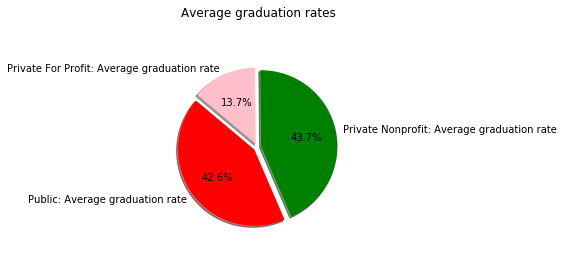

In [14]:
#Graphs the pie chart of all 50 state's graduation rates
school_types = ["Public: Average graduation rate",  "Private Nonprofit: Average graduation rate",
         "Private For Profit: Average graduation rate"]
grad_percentages = [58.45, 60.0, 18.82]
colors = ['red', 'green', 'pink']
explode = (0.05,0.05,0.05)

plt.pie(grad_percentages, explode=explode, labels=school_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Average graduation rates")
plt.savefig(r"C:\Users\mengc\Desktop\studentloan_analysis\Images\Average graduation rates PIE")
plt.tight_layout()
plt.axis("equal")

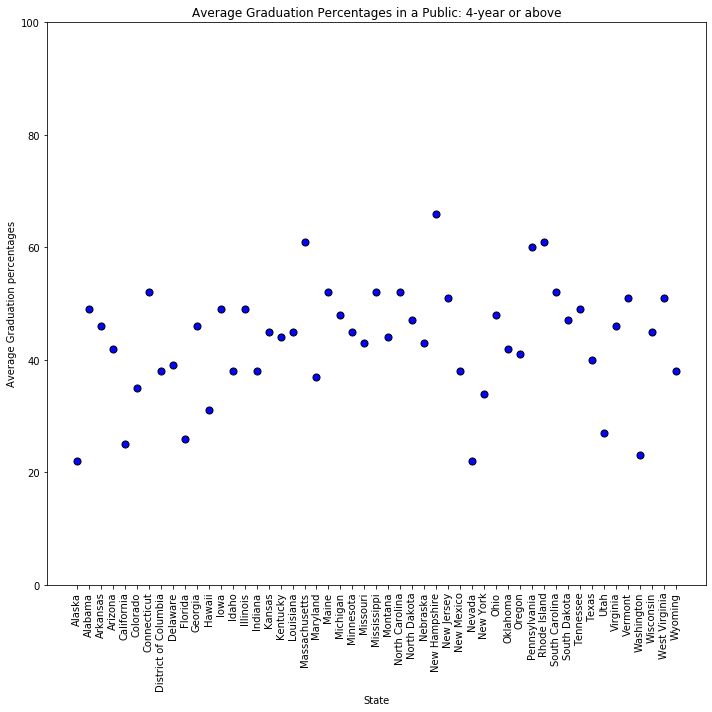

In [15]:
#Average graduation rates of singular states for 4 year public schools
x_axis = np.arange(len(graduation_percentage_state))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,10))
plt.ylim(0, 100)
plt.scatter(x_axis, average_loan_received['Public: 4-year or above'], s = 50, marker = "o", facecolors = "blue", edgecolors = "black", 
           alpha=0.99)
plt.xticks(tick_locations, average_loan_received["State"], rotation="vertical")
plt.title("Average Graduation Percentages in a Public: 4-year or above")
plt.xlabel("State")
plt.ylabel("Average Graduation percentages")
plt.tight_layout()
plt.savefig(r"C:\Users\mengc\Desktop\studentloan_analysis\Images\Average Graduation Percentages in a Public SCATTER")
plt.show()

In [16]:
#Merging of graduation states data frame and average loan data frame
combined_frame = pd.merge(graduation_percentage_state, average_loan_received, on = "State")
combined_frame.head()

,State,Public: 4-year or above_x,Private not-for-profit: 4-year or above_x,Private for-profit: 4-year or above,Public: 4-year or above_y,Private not-for-profit: 4-year or above_y,Private not-for-profit: 2-year,Private for-profit: 2-year,Public: less-than 2-year,Private for-profit: 4-year or above,Public: 2-year,Private not-for-profit: less-than 2-year,Private for-profit: less-than 2-year
0,Alaska,34.0,52.0,0.0,22.0,48.0,61.0,82.0,2.0,0.0,0.0,0.0,0.0
1,Alabama,57.0,44.0,18.0,49.0,62.0,0.0,76.0,0.0,34.0,13.0,4.0,66.0
2,Arkansas,47.0,59.0,0.0,46.0,58.0,85.0,83.0,0.0,88.0,19.0,0.0,65.0
3,Arizona,63.0,58.0,25.0,42.0,58.0,0.0,46.0,6.0,56.0,10.0,7.0,62.0
4,California,70.0,75.0,19.0,25.0,48.0,61.0,61.0,7.0,56.0,2.0,36.0,53.0


In [71]:
#A data frame for each state in graduation rates and loan rates
public_grad = combined_frame["Public: 4-year or above_x"]
state = combined_frame["State"]
public_loan = combined_frame["Public: 4-year or above_y"]

publicSummaryTable = pd.DataFrame({
    "State" : state,
    "Public: 4-year or above for Grad" : public_grad,
    "Public: 4-year or above for Loan": public_loan,
                            })

publicSummaryTable.head()
publicSummaryTable = publicSummaryTable.sort_values(by = 'Public: 4-year or above for Grad', ascending = True)
publicSummaryTable.tail()

,State,Public: 4-year or above for Grad,Public: 4-year or above for Loan
4,California,70.0,25.0
31,New Jersey,70.0,51.0
45,Virginia,73.0,46.0
12,Iowa,73.0,49.0
8,Delaware,74.0,39.0


In [18]:
#Organizing the table by ascending values for public loans
public_loan_org = publicSummaryTable.sort_values(by = 'Public: 4-year or above for Loan', ascending = True)
public_loan_org

,State,Public: 4-year or above for Grad,Public: 4-year or above for Loan
0,Alaska,34.0,22.0
33,Nevada,49.0,22.0
47,Washington,67.0,23.0
4,California,70.0,25.0
9,Florida,69.0,26.0
44,Utah,47.0,27.0
11,Hawaii,54.0,31.0
34,New York,64.0,34.0
5,Colorado,58.0,35.0
20,Maryland,68.0,37.0


In [55]:
#Calculates ratios for public colleges
public_df_index = publicSummaryTable.set_index("State")
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
max_ratio = 0
max_state = ''
min_ratio = 1
min_state = ''

for states in state_names:
    ratio = public_df_index.loc[str(states)]["Public: 4-year or above for Grad"]/public_df_index.loc[str(states)]["Public: 4-year or above for Loan"]
    if ratio > max_ratio :
        max_ratio = ratio
        max_state = states
    if ratio < min_ratio:
        min_ratio = ratio
        min_state = states
print(max_ratio)
print(max_state)
print(min_ratio)
print(min_state) 

2.9130434782608696
Washington
0.9803921568627451
West Virginia


In [61]:
#Calculates Ratio for private colleges
private_loan_org = privateNotForprofitSummaryTable.sort_values(by = 'Private not-for-profit: 4-year for Loan', ascending = True)
private_loan_org

private_df_index = private_loan_org.set_index("State")
state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
max_ratio = 0
max_state = ''
min_ratio = 1
min_state = ''

for states in state_names:
    ratio = private_df_index.loc[str(states)]['Private not-for-profit: 4-year for Grad']/private_df_index.loc[str(states)]['Private not-for-profit: 4-year for Loan']
    if ratio > max_ratio :
        max_ratio = ratio
        max_state = states
    if 0 < ratio < min_ratio:
        min_ratio = ratio
        min_state = states
print(max_ratio)
print(max_state)
print(min_ratio)
print(min_state) 

3.1739130434782608
Washington
0.7692307692307693
Delaware


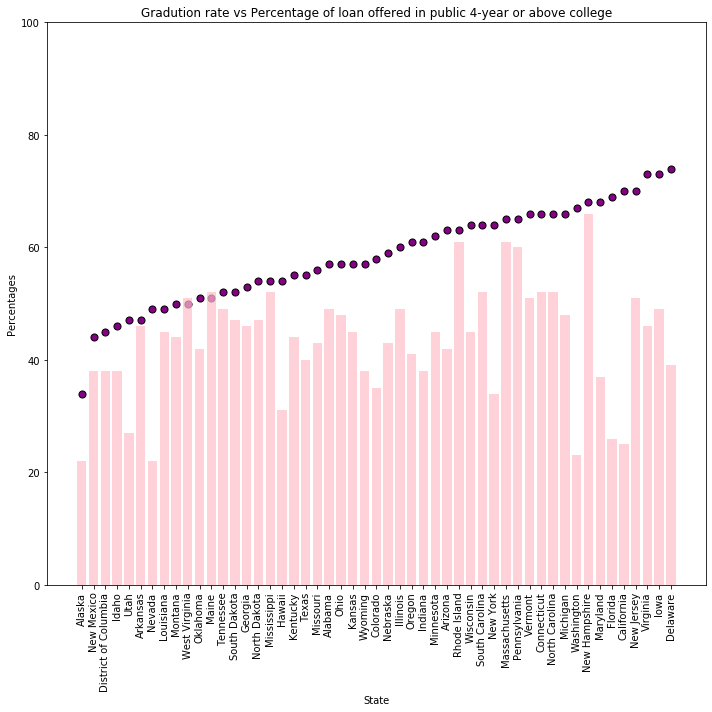

In [19]:
#Graphing Gradution rate vs Percentage of loan offered in public 4-year as a scatter and bar graph
plt.figure(figsize=(10,10))
plt.ylim(0, 100)
x_axis = np.arange(len(publicSummaryTable))
tick_locations = [value for value in x_axis]

grad = plt.scatter(publicSummaryTable["State"], publicSummaryTable["Public: 4-year or above for Grad"],s = 50, marker = "o", facecolors = "purple", edgecolors = "black", 
           alpha=0.99)
loan = plt.bar(publicSummaryTable["State"], publicSummaryTable["Public: 4-year or above for Loan"], color='pink', alpha=0.7, align="center")
plt.xticks(tick_locations, publicSummaryTable["State"], rotation="vertical")

plt.title("Gradution rate vs Percentage of loan offered in public 4-year or above college")
plt.xlabel("State")
plt.ylabel("Percentages")
plt.tight_layout()
plt.savefig(r"C:\Users\mengc\Desktop\studentloan_analysis\Images\Gradution rate vs Percentage of loan offered in public 4-year SCATTER-BAR")
plt.show()

In [72]:
#Data frame creating a ratio of private not for profit and its graduation rate
privateNotForprofit = combined_frame["Private not-for-profit: 4-year or above_x"]
state = combined_frame["State"]
privateNotForprofit_loan = combined_frame["Private not-for-profit: 4-year or above_y"]

privateNotForprofitSummaryTable = pd.DataFrame({
    "State" : state,
    "Private not-for-profit: 4-year for Grad" : privateNotForprofit,
    "Private not-for-profit: 4-year for Loan": public_loan,
                            })

privateNotForprofitSummaryTable.head()
privateNotForprofitSummaryTable = privateNotForprofitSummaryTable.sort_values(by = "Private not-for-profit: 4-year for Grad", ascending = True)
privateNotForprofitSummaryTable.head()

,State,Private not-for-profit: 4-year for Grad,Private not-for-profit: 4-year for Loan
50,Wyoming,0.0,38.0
8,Delaware,30.0,39.0
49,West Virginia,43.0,51.0
1,Alabama,44.0,49.0
32,New Mexico,46.0,38.0


In [64]:
#Graphing similar loan amount given states public by their grad rates in ascending order
public_df_index = RatioSummaryTable.set_index("State")
publicRatioDataframe = pd.DataFrame({
    "State" : ["Maryland", "Indiana",  "New Mexico",  "District of Coiumbia", "Wyoming", "Delaware"],
    "Graduation Rates" : [68, 61, 44, 45, 57, 74]
})

publicRatioDataframe.head()
publicRatioDataframe = publicRatioDataframe.sort_values(by = "Graduation Rates", ascending = True)
publicRatioDataframe

,State,Graduation Rates
2,New Mexico,44
3,District of Coiumbia,45
4,Wyoming,57
1,Indiana,61
0,Maryland,68
5,Delaware,74


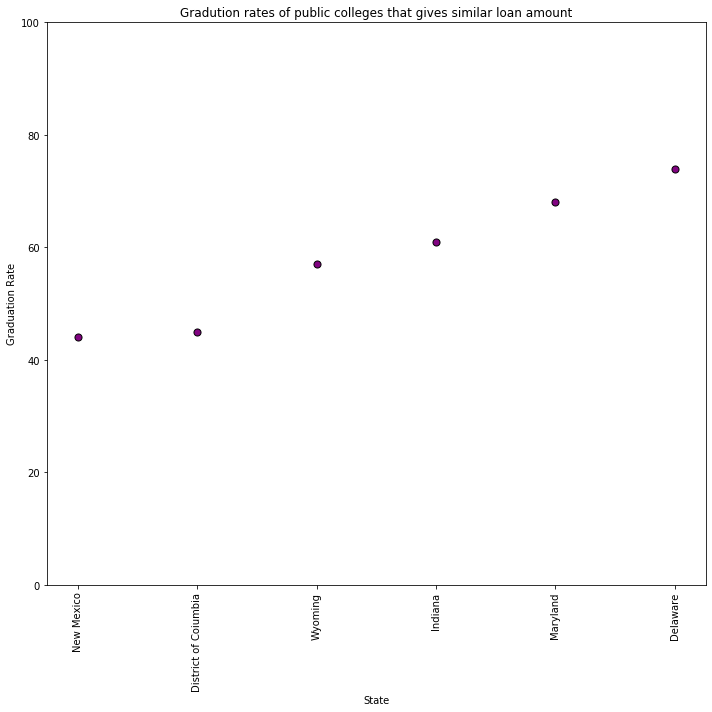

In [65]:
#Graphing public graduation rates of similar loan giving states

plt.figure(figsize=(10,10))
plt.ylim(0, 100)
x_axis = np.arange(len(publicRatioDataframe))
tick_locations = [value for value in x_axis]

grad = plt.scatter(publicRatioDataframe["State"], publicRatioDataframe["Graduation Rates"],s = 50, marker = "o", facecolors = "purple", edgecolors = "black", 
           alpha=0.99)
plt.xticks(tick_locations, publicRatioDataframe["State"], rotation="vertical")

plt.title("Gradution rates of public colleges that gives similar loan amount")
plt.xlabel("State")
plt.ylabel("Graduation Rate")
plt.tight_layout()
plt.savefig(r"C:\Users\mengc\Desktop\studentloan_analysis\Images\Gradution rates of public colleges that gives similar loan amounts SCATTER")
plt.show()

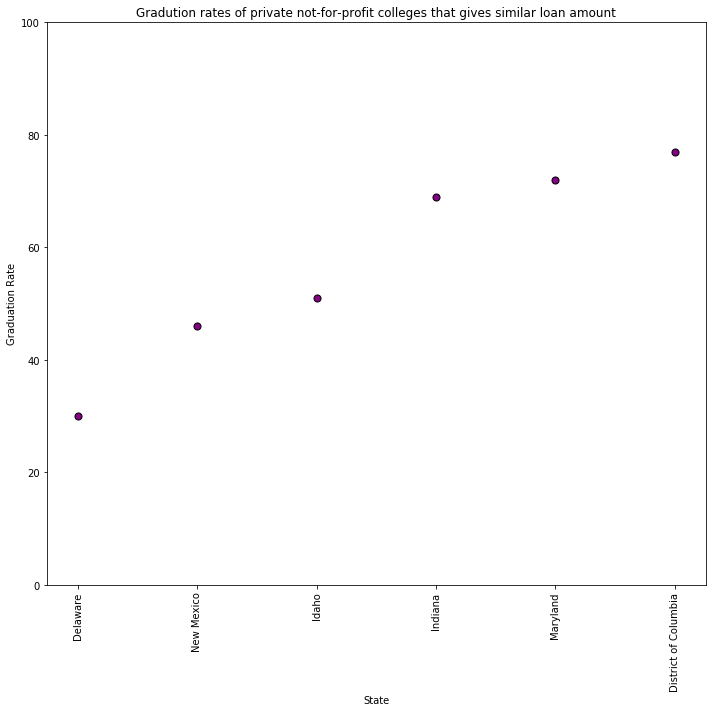

In [31]:
#Graphing graduation rates of similar loan giving states

plt.figure(figsize=(10,10))
plt.ylim(0, 100)
x_axis = np.arange(len(ratioDataframe))
tick_locations = [value for value in x_axis]

grad = plt.scatter(ratioDataframe["State"], ratioDataframe["Graduation Rates"],s = 50, marker = "o", facecolors = "purple", edgecolors = "black", 
           alpha=0.99)
plt.xticks(tick_locations, ratioDataframe["State"], rotation="vertical")

plt.title("Gradution rates of private not-for-profit colleges that gives similar loan amount")
plt.xlabel("State")
plt.ylabel("Graduation Rate")
plt.tight_layout()
plt.savefig(r"C:\Users\mengc\Desktop\studentloan_analysis\Images\Gradution rates of private not-for-profit colleges that gives similar loan amounts SCATTER")
plt.show()

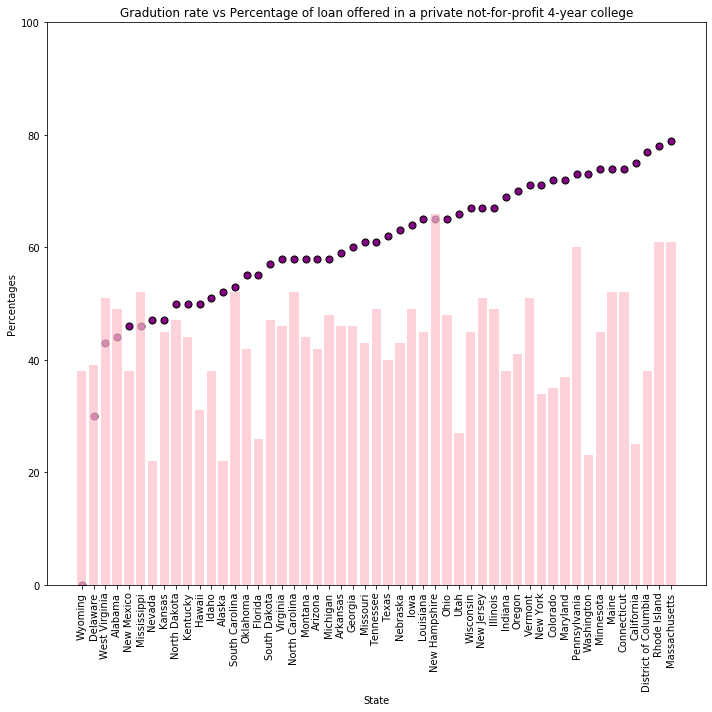

In [24]:
#Graphing Gradution rate vs Percentage of loan offered in private not-for-profit 4-year as a scatter and bar graph

plt.figure(figsize=(10,10))
plt.ylim(0, 100)
x_axis = np.arange(len(privateNotForprofitSummaryTable))
tick_locations = [value for value in x_axis]

grad = plt.scatter(privateNotForprofitSummaryTable["State"], privateNotForprofitSummaryTable["Private not-for-profit: 4-year for Grad"],s = 50, marker = "o", facecolors = "purple", edgecolors = "black", 
           alpha=0.99)
loan = plt.bar(privateNotForprofitSummaryTable["State"], privateNotForprofitSummaryTable["Private not-for-profit: 4-year for Loan"], color='pink', alpha=0.7, align="center")
plt.xticks(tick_locations, privateNotForprofitSummaryTable["State"], rotation="vertical")

plt.title("Gradution rate vs Percentage of loan offered in a private not-for-profit 4-year college")
plt.xlabel("State")
plt.ylabel("Percentages")
plt.tight_layout()
plt.savefig(r"C:\Users\mengc\Desktop\studentloan_analysis\Images\Gradution rate vs loan percentages offered in a private not-for-profit 4-year college SCATTER-BAR")
plt.show()

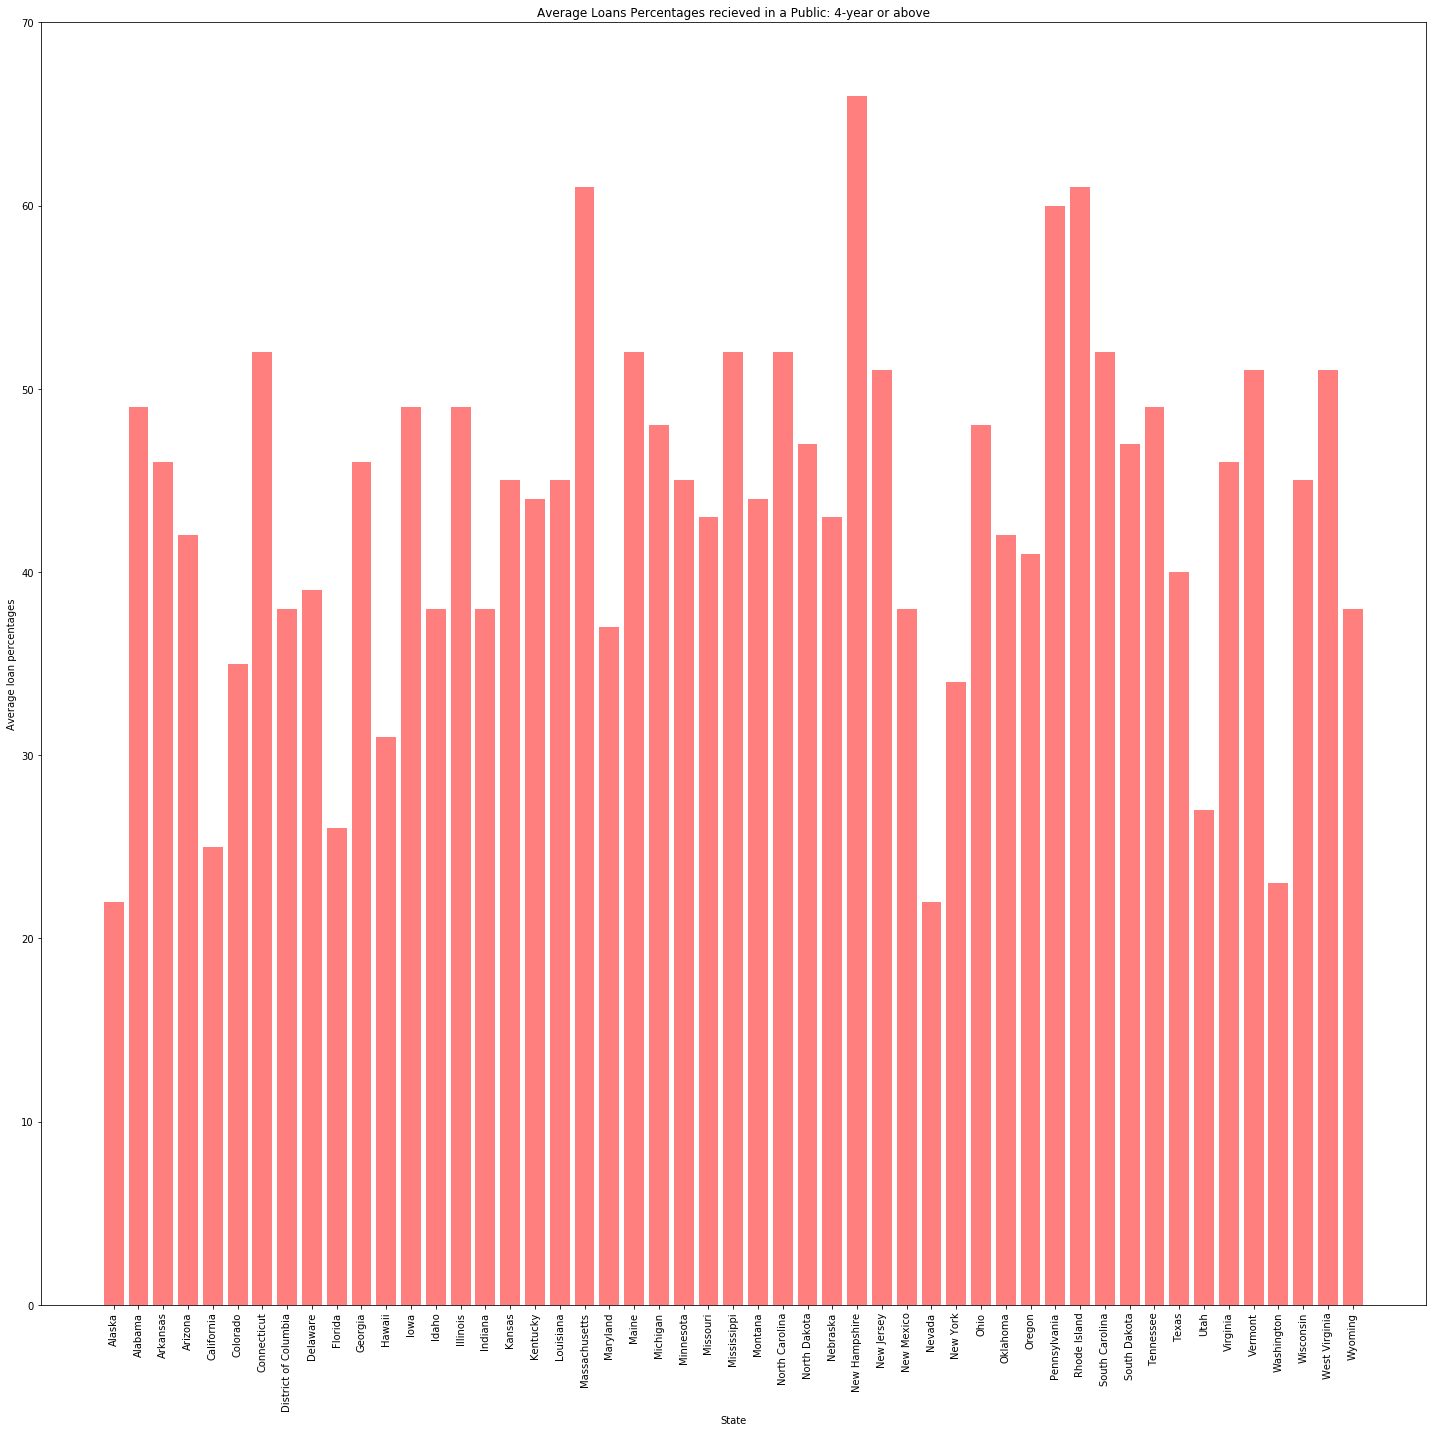

In [25]:
x_axis = np.arange(len(average_loan_received))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,20))
plt.ylim(0, 70)
plt.bar(x_axis, average_loan_received["Public: 4-year or above"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, average_loan_received["State"], rotation="vertical")
plt.title("Average Loans Percentages recieved in a Public: 4-year or above")
plt.xlabel("State")
plt.ylabel("Average loan percentages")
plt.tight_layout()
plt.show()